In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('creditcard(1.csv')
df=pd.DataFrame(df)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,470976.000000,4.709760e+05,4.709760e+05,4.709760e+05,4.709760e+05,4.709760e+05,470975.000000
mean,13.576894,1.682956e+05,9.070671e+05,9.268921e+05,9.832146e+05,1.166895e+06,0.000495
std,3.591557,2.754869e+05,2.976516e+06,3.013899e+06,2.339566e+06,2.518144e+06,0.022237
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,11.000000,1.345769e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,14.000000,8.189134e+04,1.862253e+04,0.000000e+00,1.161880e+05,2.216576e+05,0.000000
75%,17.000000,2.250977e+05,1.733721e+05,2.135472e+05,8.942368e+05,1.205843e+06,0.000000
max,19.000000,1.000000e+07,3.890000e+07,3.890000e+07,4.150000e+07,4.150000e+07,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470976 entries, 0 to 470975
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            470976 non-null  int64  
 1   type            470976 non-null  object 
 2   amount          470976 non-null  float64
 3   nameOrig        470976 non-null  object 
 4   oldbalanceOrg   470976 non-null  float64
 5   newbalanceOrig  470976 non-null  float64
 6   nameDest        470976 non-null  object 
 7   oldbalanceDest  470976 non-null  float64
 8   newbalanceDest  470976 non-null  float64
 9   isFraud         470975 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 35.9+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.step	=le.fit_transform(df['step'])
#df.amount	=le.fit_transform(df['amount'])
df.amount=le.fit_transform(df['amount'])
df.isFraud	=le.fit_transform(df['isFraud'])

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,PAYMENT,88618,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,0,PAYMENT,18263,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,0,TRANSFER,1745,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,0,CASH_OUT,1745,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,0,PAYMENT,101456,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
X=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest'] ].to_numpy()
X = np.asarray(X, dtype = 'int')
y=df['isFraud'].to_numpy()

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### **SVC**

In [ ]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
train_score_c4 = svc_model.score(X_train, y_train)
test_score_c4 = svc_model.score(X_test, y_test)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 1.00
Classical SVC on the test dataset:     1.00


In [ ]:
y_pred_svc=svc_model.predict(X_test)

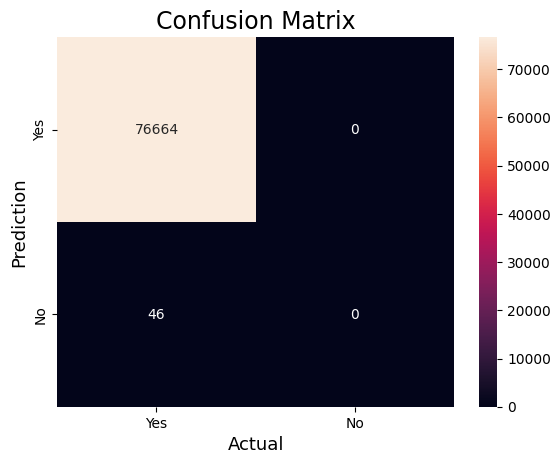

In [ ]:
from sklearn.metrics import confusion_matrix

cm_svc=confusion_matrix( y_test, y_pred_svc )
sns.heatmap(cm_svc,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.8 MB/s eta 0:00:00


In [ ]:
pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512576 sha256=06b6aa1e5f19d816a4cc937b14309ded4a410c89b9f4a99f3bc45c10eb6e4ba5
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=be9672ead26dc6b28ae9e11f5a5a9fb2390aeff4711fc8846c7292580aa2e2f4
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


VQC

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


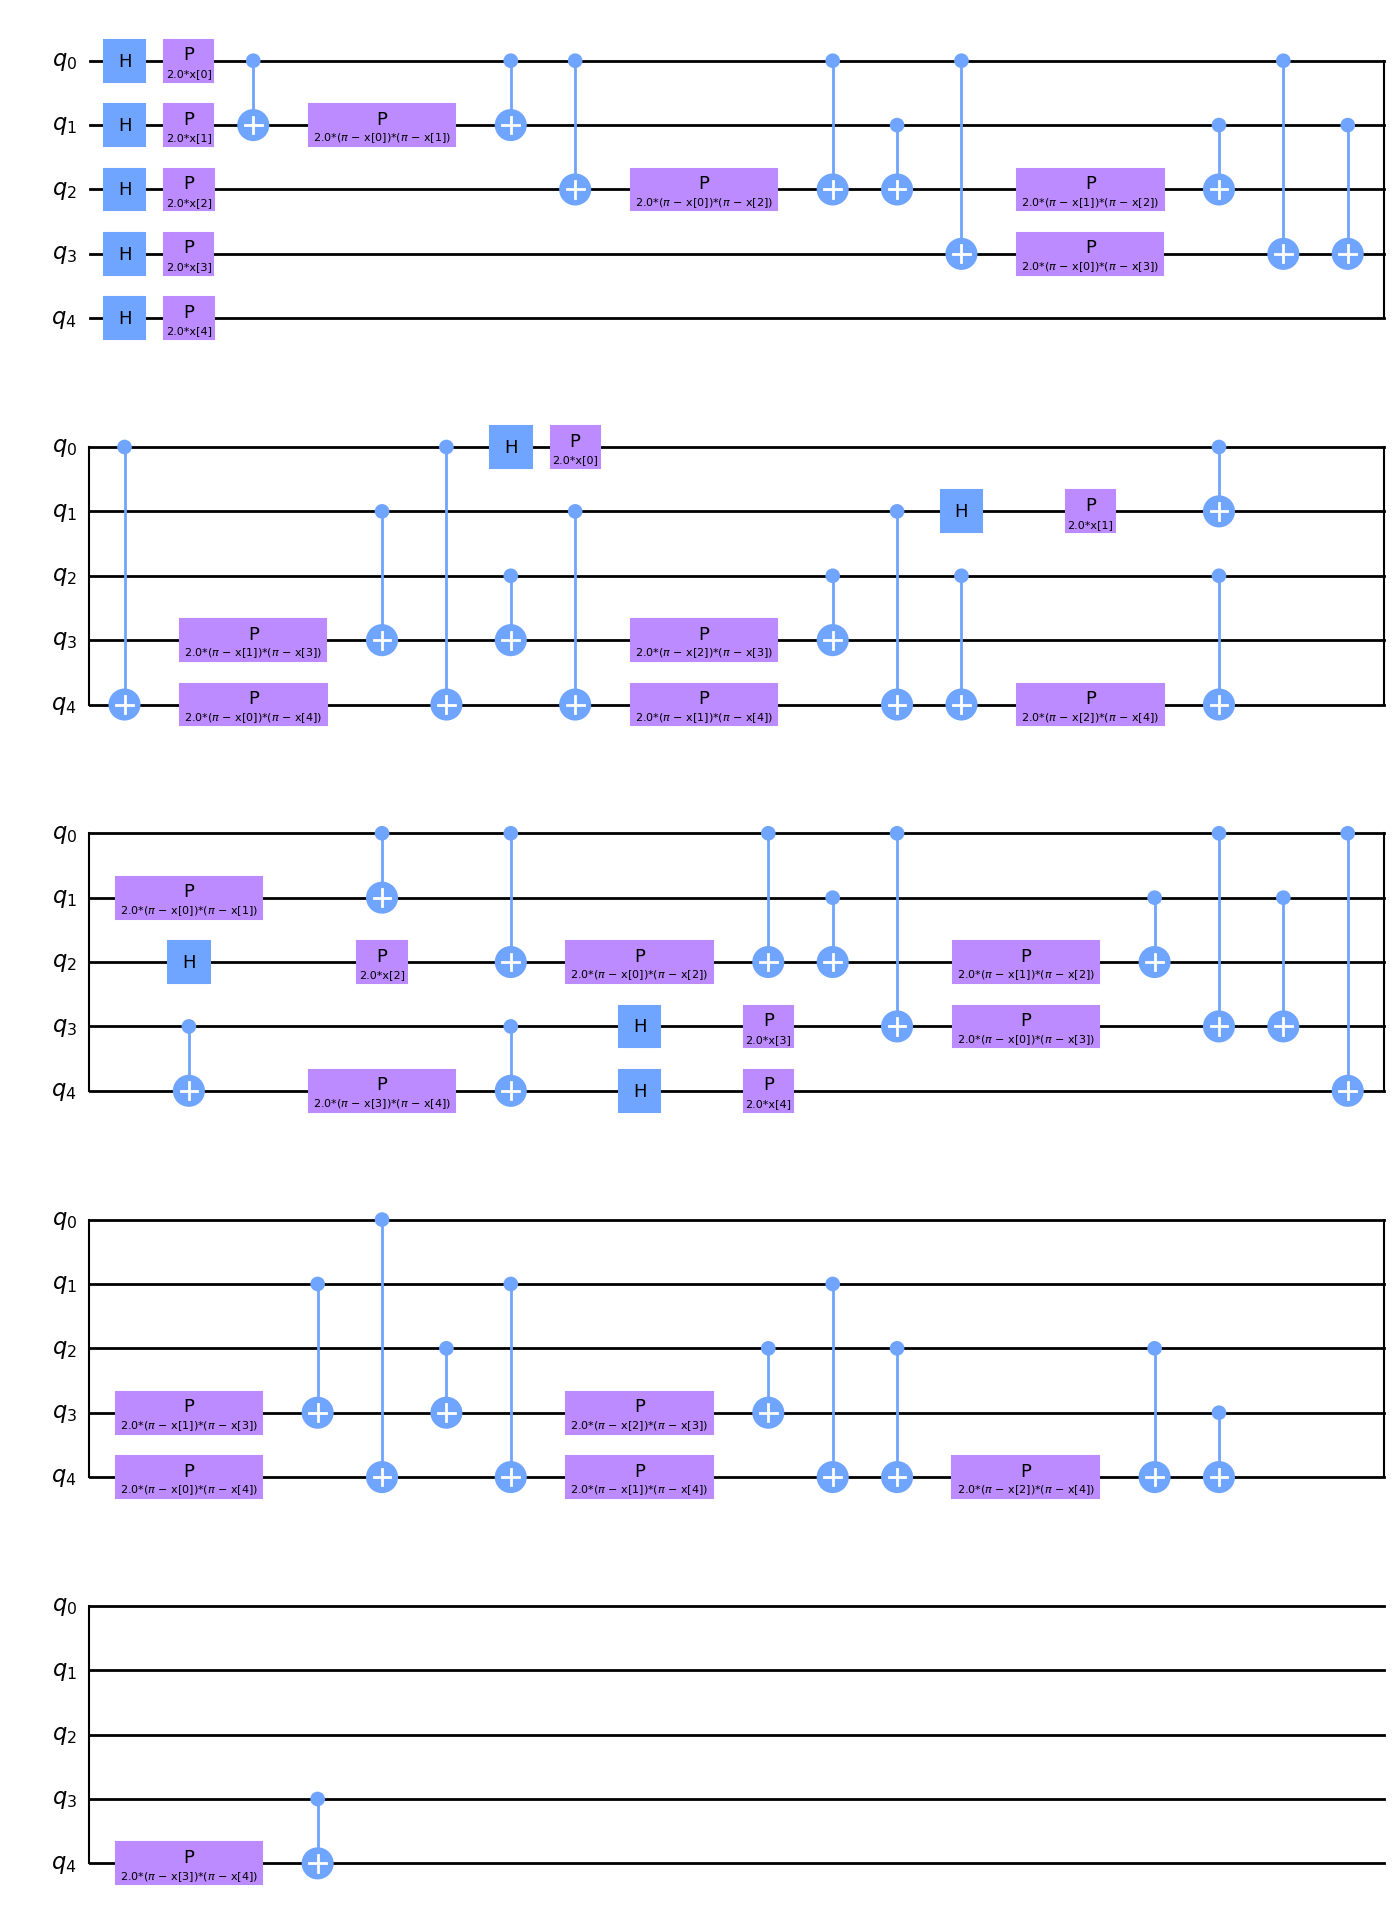

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_features = X.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


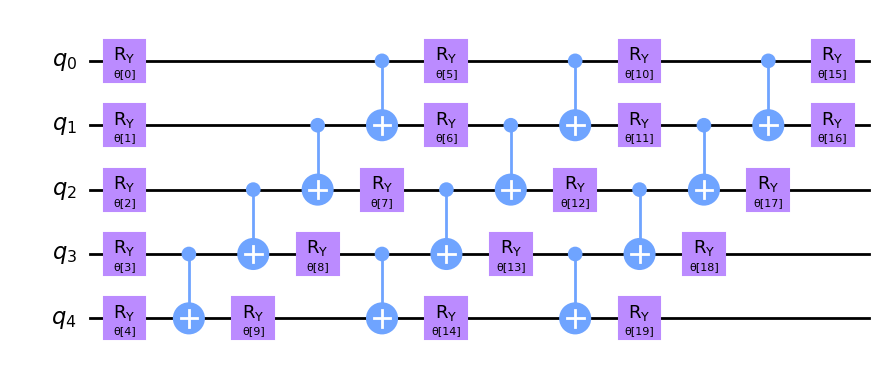

In [ ]:

from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [ ]:

from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=10)

from qiskit.primitives import Sampler

sampler = Sampler()

<ipython-input-19-f1d1a9cbe2d3>:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.algorithms.classifiers import QSVC

In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc1 = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc1.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

KeyboardInterrupt: ignored

In [ ]:
train_score_q4 = vqc1.score(X_train, y_train)
test_score_q4 = vqc1.score(X_test, y_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

NameError: ignored

NameError: ignored

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 52.2 MB/s eta 0:00:00


# QNN
